In [64]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from zipfile import ZipFile
from io import BytesIO
import PIL.Image
import pickle
import time
from datetime import timedelta
import random


In [65]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/cassava/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
trainzip = ZipFile(path + "train_images.zip", 'r')

labels_raw = pd.read_csv(path + "train.csv", 
                         header=0, sep=',', quotechar='"')

In [67]:
# selecting a random sample of 100 images to try out data augmentation
sample_size = 100
sample_idx = random.sample(range(len(trainzip.namelist())), sample_size)

In [68]:
images = np.zeros((sample_size,600, 800, 3))
labels = np.empty(sample_size, dtype = "object")


# for i in range(0,len(trainzip.namelist()[:100])):
for i in range(len(sample_idx)):
    filename = BytesIO(trainzip.read(trainzip.namelist()[sample_idx[i]]))
    image = PIL.Image.open(filename) 
    image = np.array(image)
    image = np.clip(image/255.0, 0.0, 1.0) #255 = max of the value of a pixel
    images[i]=image
    labels[i]=list(labels_raw[labels_raw['image_id']==trainzip.namelist()[i][:]]['label'])[0]


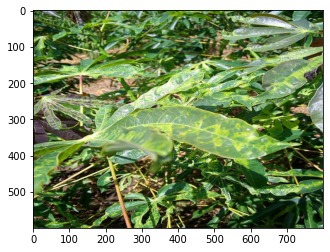

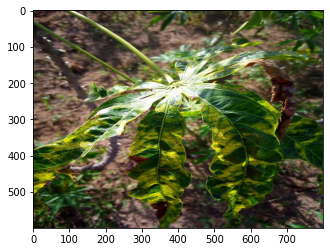

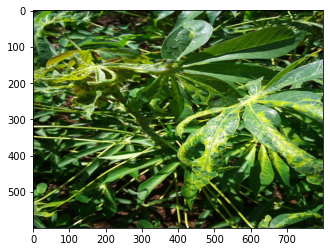

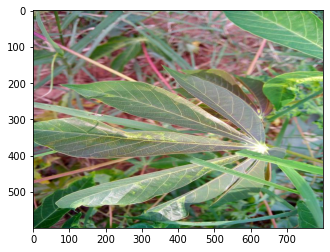

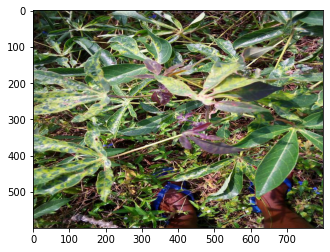

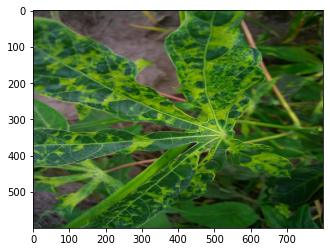

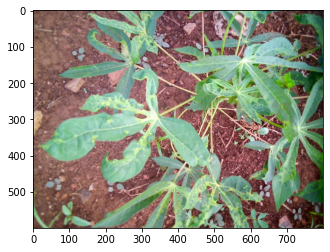

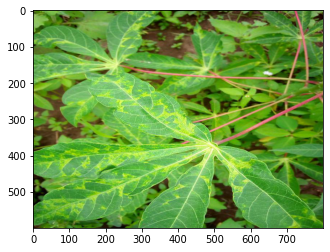

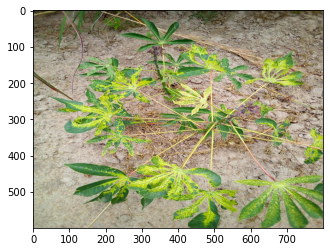

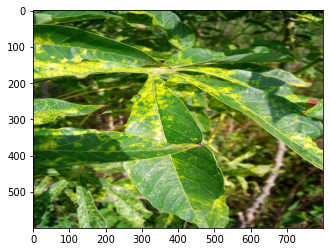

In [69]:
# view some images from sample of original training set
for i in range(10):
  plt.imshow(images[i])
  plt.show()

In [70]:
labels1h = pd.get_dummies(labels)
X = images
y = labels1h

In [71]:
# We found that 'reflect' for the fill_mode argument generates by far the most realistic augmented images, see below

train_augmenter = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='reflect'
)


In [72]:
train_aug = train_augmenter.flow(X, y=y, batch_size = 10)

In [73]:
def augment_plotter(X, y, batches_to_plot, batch_size = 10):
  train_aug = train_augmenter.flow(X, y=y, batch_size=batch_size)
  batch_count = 0
  for train,labels in train_aug:
    batch_count +=1
    if batch_count > batches_to_plot:
      break
    for image in train:
      plt.imshow(image)
      plt.show()

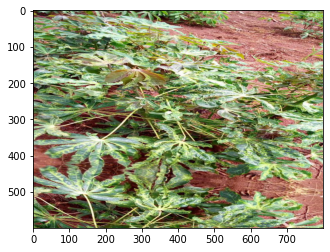

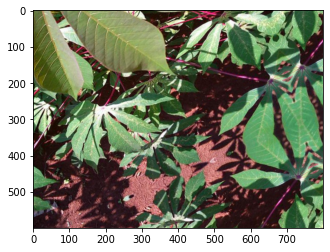

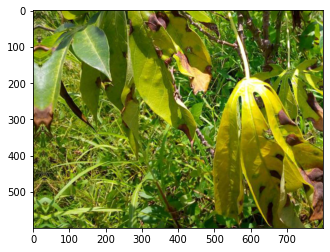

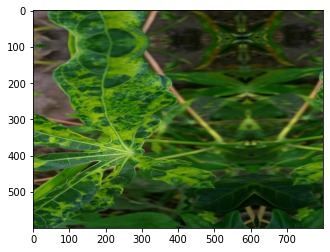

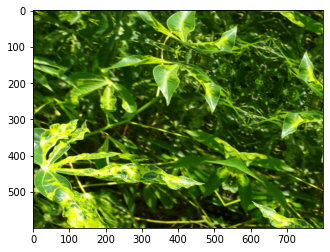

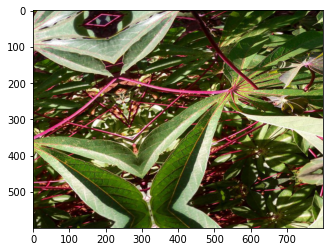

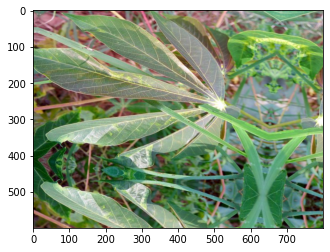

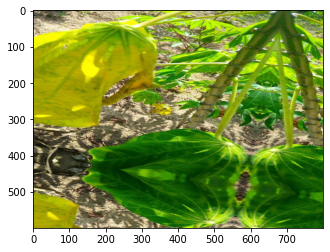

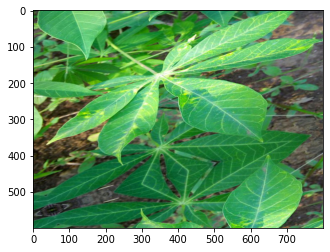

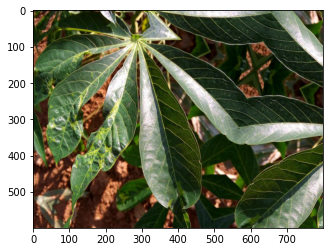

In [75]:
augment_plotter(X,y,1,10)